In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("netflix.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe(include=object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum() / len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Data cleaning and Pre-Processing

In [11]:
# Filling and removeing the null values
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.director.fillna("Director Unavailable", inplace=True)
df.cast.fillna("Cast Unavailable", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added"], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['year'] = pd.DatetimeIndex(df['date_added']).year
df['month'] = pd.DatetimeIndex(df['date_added']).month

Exploratory Data Analysis

In [12]:
df['type'].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

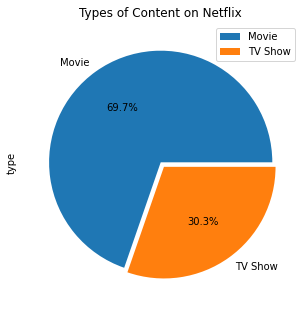

In [13]:
## The type of content on Netflix
content_type = df['type'].value_counts()
plt.figure(figsize=(5,6))
explode=(0,0.05)
df['type'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=explode)
plt.legend()
plt.title('Types of Content on Netflix')
plt.show()

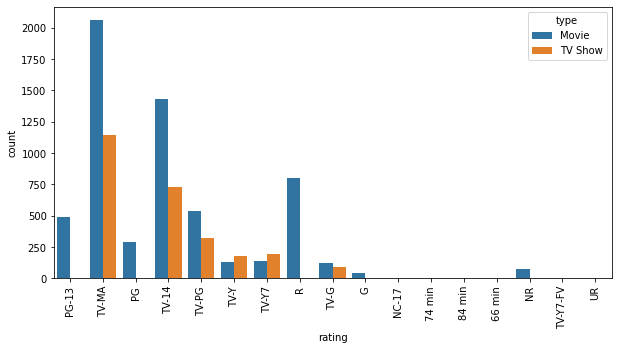

In [14]:
## Majority of content available on Netflix based on rating
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', hue='type')
plt.xticks(rotation=90)
plt.show()

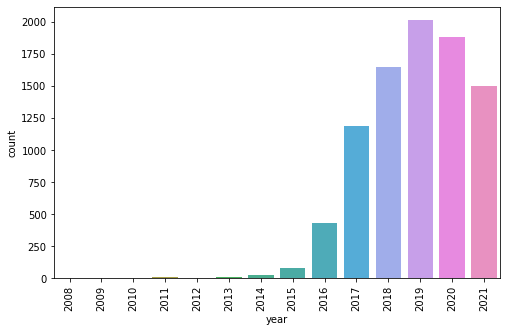

In [15]:
## The Year in which Netflix released Maximum content
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['year'])
plt.xticks(rotation=90)
plt.show()

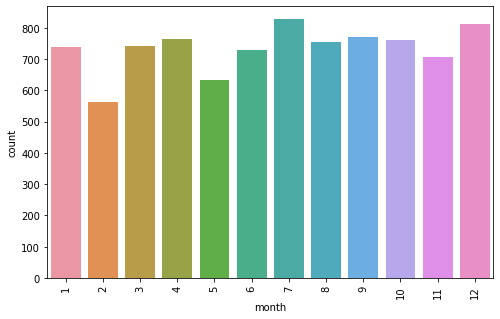

In [16]:
## Number of content released by NetFlix on monthly basis
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['month'])
plt.xticks(rotation=90)
plt.show()

In [17]:
tv_show = df[df['type'] == 'TV Show']
movie = df[df['type'] == 'Movie']

In [ ]:
tv_show["duration"] = tv_show["duration"].str.replace(" Seasons","")
tv_show["duration"] = tv_show["duration"].str.replace(" Season","")
tv_show["duration"] = tv_show["duration"].astype(int)

In [19]:
## The average duration of TV shows present on Netflix
tv_show["duration"].mean()

1.7513128282070518

In [ ]:
movie["duration"] = movie["duration"].str.replace(" min","")
movie.dropna(subset=["duration"], inplace=True)
movie['duration'] = movie['duration'].astype(int)

In [21]:
## The average duration of most of the movies present on Netflix
movie['duration'].mean()

99.57718668407311

In [22]:
country = df['country'].apply(lambda x: str(x).split(', ')).tolist()

In [23]:
df_country = pd.DataFrame(country, index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country).reset_index()
df_country = df_country[['title',0]]
df_country.columns=['title','country']

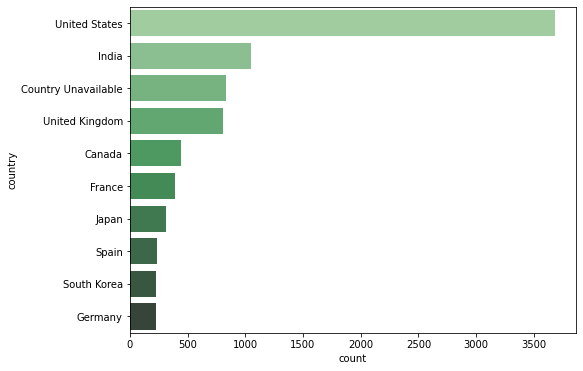

In [24]:
## Top 10 countries that produce maximum content for Netflix
plt.figure(figsize=(8,6))
sns.countplot(y="country", data=df_country, palette="Greens_d",
              order=df_country.country.value_counts().iloc[:10].index)
plt.show()

In [25]:
cast = df['cast'].apply(lambda x: str(x).split(', ')).tolist()

In [26]:
df_cast = pd.DataFrame(cast, index=df['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast).reset_index()
df_cast = df_cast[['title',0]]
df_cast.columns=['title','cast']

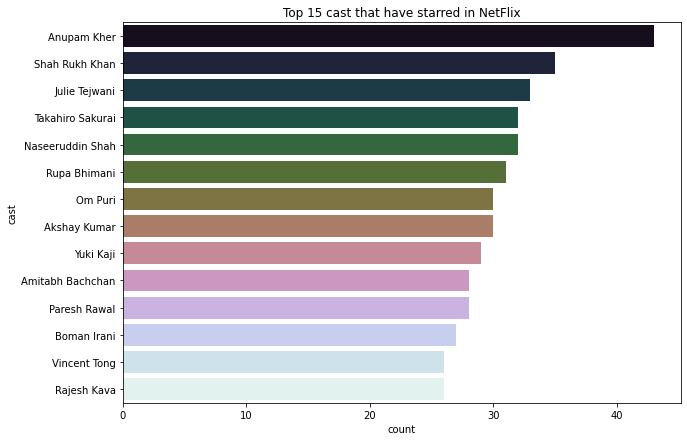

In [27]:
## Top 15 cast that have starred on NetFlix
plt.figure(figsize=(10,7))
sns.countplot(y="cast", data=df_cast, palette="cubehelix",
              order=df_cast.cast.value_counts().iloc[1:15].index)
plt.title("Top 15 cast that have starred in NetFlix")
plt.show()

In [28]:
director = df['director'].apply(lambda x: str(x).split(', ')).tolist()

In [29]:
df_director = pd.DataFrame(director, index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director).reset_index()
df_director = df_director[['title',0]]
df_director.columns=['title','director']

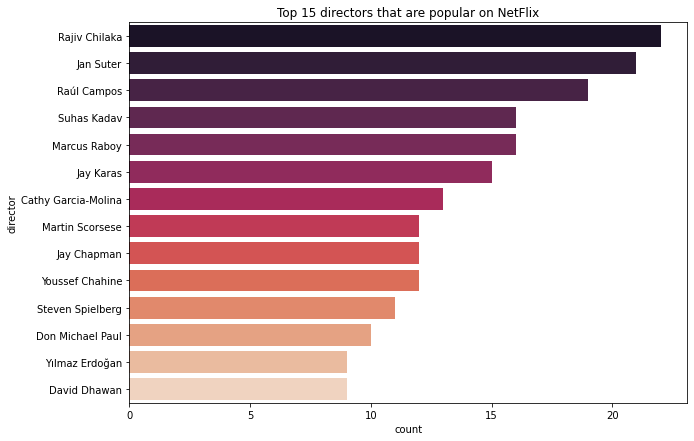

In [30]:
## Top 15 directors that are popular on NetFlix
plt.figure(figsize=(10,7))
sns.countplot(y="director", data=df_director, palette="rocket",
              order=df_director.director.value_counts().iloc[1:15].index)
plt.title("Top 15 directors that are popular on NetFlix")
plt.show()

In [31]:
listed_in = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()

In [32]:
df_listed_in = pd.DataFrame(listed_in, index=df['country'])
df_listed_in = df_listed_in.stack()
df_listed_in = pd.DataFrame(df_listed_in).reset_index()
df_listed_in = df_listed_in[['country',0]]
df_listed_in.columns=['country','listed_in']

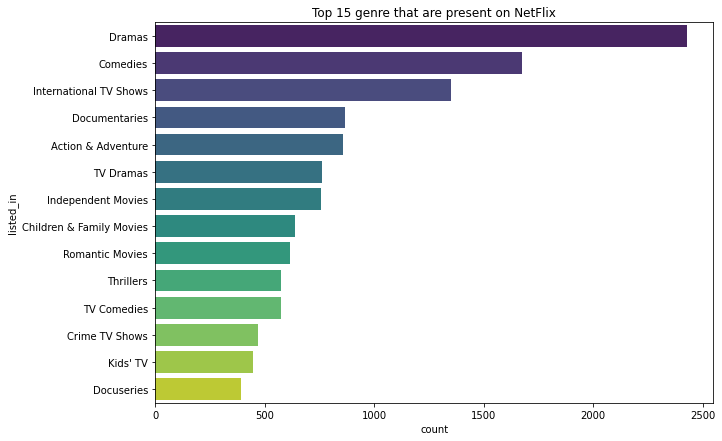

In [33]:
## Top 15 genre that are present on NetFlix
plt.figure(figsize=(10,7))
sns.countplot(y="listed_in", data=df_listed_in, palette="viridis",
              order=df_listed_in.listed_in.value_counts().iloc[1:15].index)
plt.title("Top 15 genre that are present on NetFlix")
plt.show()

**Recommendations**:
1. Majority of the Movies and T.V. shows present on NetFlix come from the United States and India. So Netflix can focus more on other countries as well to get relevant content.
2. Also NetFlix may prefer the movies and T.V. shows of top directors and cast to increase the number of users.
3. The average watch time of a user can be increased by increasing the durations of Movies and T.V. shows.